# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Agnes I. Nababan]
- **Email:** [m404b4kx0173@bangkit.academy]
- **ID Dicoding:** [agnesimanuelanababan]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?
- Bagaimana tren penggunaan sepeda sepanjang hari dan apakah ada perbedaan antara hari kerja dan hari libur?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


## Data Wrangling

### Gathering Data

In [2]:
# 1. Data Loading and Initial Exploration
## 1.1 Load the datasets
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

## 1.2 Display the first few rows of each dataset
display(day_df.head())
display(hour_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Menampilkan data Hour dan Day

### Assessing Data

####2.Menilai Data Day dan Hour

In [3]:
print("Day Dataset Info:")
day_df.info()
print ("\nHour Dataset Info")
hour_df.info()


Day Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Hour Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

####2.1 Kode di bawah ini akan menampilkan informasi terkait jumlah missing values

In [4]:
day_df.isna().sum()
hour_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


####2.2 Memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada day_df dan hour_df

In [5]:
print("Jumlah duplikasi day: ",day_df.duplicated().sum())
day_df.describe()
print("Jumlah duplikasi hour: ",hour_df.duplicated().sum())
hour_df.describe()


Jumlah duplikasi day:  0
Jumlah duplikasi hour:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


####2.3 Memeriksa parameter statistik, kita akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.)

In [6]:
day_df.describe(include="all")
hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Proses pengecekan missing value, duplicat pada data dan hasilnya 0,artinya data sudah betul
- Proses pengecekan data terdapat kesalahan pada kolom data dteday

### Cleaning Data

#### 3. Data Cleaning and Preprocessing

In [7]:
def preprocess_data(df):
    # Convert date columns
    df['dteday'] = pd.to_datetime(df['dteday'])

    # Map categorical variables
    season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
    weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

    df['season'] = df['season'].map(season_map)
    df['weathersit'] = df['weathersit'].map(weather_map)

    return df

day_df = preprocess_data(day_df)
hour_df = preprocess_data(hour_df)

In [8]:
day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Hasil muncul data pada kolom date berubah
- Tabel pada data season dan weathersit dari map kategori sudah berubah

## Exploratory Data Analysis (EDA)

### Explore Data Day


####Analisis Musim (season).Melihat berapa kali data unik (jumlah rekaman unik di instant) terjadi di setiap musim, serta statistik dari yr (tahun) di musim tersebut.
####Statistik max, min, mean, dan std menunjukkan distribusi data dalam setiap musim.

In [ ]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "yr": ["max", "min", "mean", "std"]
})

instant  yr                        
       nunique max min      mean       std
season                                    
1          181   1   0  0.502762  0.501379
2          184   1   0  0.500000  0.501364
3          188   1   0  0.500000  0.501335
4          178   1   0  0.500000  0.501410

In [9]:
#Kode ini bertujuan untuk menganalisis perbedaan penggunaan sepeda berdasarkan musim dan tipe pengguna (casual dan registered)
day_df.groupby(by="casual").yr.nunique().sort_values(ascending=False)
day_df.groupby(by="registered").yr.nunique().sort_values(ascending=False)

,yr
registered,
3425,2
4429,2
3946,2
2115,2
2713,2
...,...
2993,1
3019,1
3040,1


###Eksplorasi Data Hour

####Menghitung Pengguna Tanpa Membership:nonmembership menghitung jumlah pengguna sepeda yang tidak terdaftar sebagai pengguna terdaftar (cnt - registered).
####Kolom cnt berisi total pengguna sepeda, dan registered berisi jumlah pengguna terdaftar. Hasilnya disortir dalam urutan menurun untuk melihat nilai tertinggi terlebih dahulu.

In [10]:
nonmembership = hour_df["cnt"] - hour_df["registered"]
nonmembership.sort_values(ascending=False)

,0
10477,367
15343,362
11985,361
10476,357
11986,356
...,...
1484,0
11113,0
10008,0
9198,0


####Kode ini melakukan merge atau penggabungan dua dataframe (hour_df dan day_df).Menggabungkan dua dataframe berdasarkan kolom yr di kedua dataframe.Menampilkan lima baris pertama dari dataframe gabungan hour_day_df untuk melihat hasil penggabungan.

In [11]:
hour_day_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="yr",
    right_on="yr"
)
hour_day_df.head()

,instant_x,dteday_x,season_x,yr,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,...,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,...,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,...,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,...,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,...,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
#Kode ini bertujuan untuk menganalisis jumlah penggunaan sepeda yang tidak terdaftar (casual_y) dengan menghitung jumlah instance unik (instant_x) per kategori pengguna casual
hour_day_df.groupby(by="casual_y").instant_x.nunique().sort_values(ascending=False).reset_index().head(10)

,casual_y,instant_x
0,440,17379
1,467,17379
2,244,17379
3,830,17379
4,502,17379
5,982,17379
6,486,17379
7,841,17379
8,477,17379
9,846,17379


In [13]:
#Digunakan untuk menganalisis pengguna yang terdaftar (registered_y) dengan menghitung jumlah instance unik (instant_x) per kelompok pengguna terdaftar.
hour_day_df.groupby(by="registered_y").instant_x.nunique().sort_values(ascending=False)

,instant_x
registered_y,
4429,17379
3578,17379
4109,17379
4111,17379
1707,17379
...,...
4018,8645
4008,8645
4004,8645


In [14]:
#Kode ini digunakan untuk menganalisis pengaruh kondisi cuaca (kolom weathersit_y) terhadap jumlah instance unik (kolom instant_x)
hour_day_df.groupby(by="weathersit_y").instant_x.nunique().sort_values(ascending=False)

,instant_x
weathersit_y,
Clear,17379
Light Snow/Rain,17379
Mist,17379


In [15]:
##Kode ini digunakan untuk menganalisis pengaruh kolom workingday terhadap jumlah instance unik (kolom instant_x)
hour_day_df.groupby(by="workingday_y").instant_x.nunique().sort_values(ascending=False)

,instant_x
workingday_y,
0,17379
1,17379


In [16]:
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,...,6.0,0.0,Mist,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear,...,0.0,0.0,Mist,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear,...,1.0,1.0,Clear,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear,...,2.0,1.0,Clear,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear,...,3.0,1.0,Clear,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [17]:
all_df.to_csv('all_data.csv', index=False)

**Insight:**
- melakukan merge atau penggabungan dua dataframe (hour_df dan day_df)
- Membuat all_df yaitu gabungan dari 2 dataframe

## Visualization & Explanatory Analysis

### Pertanyaan 1:

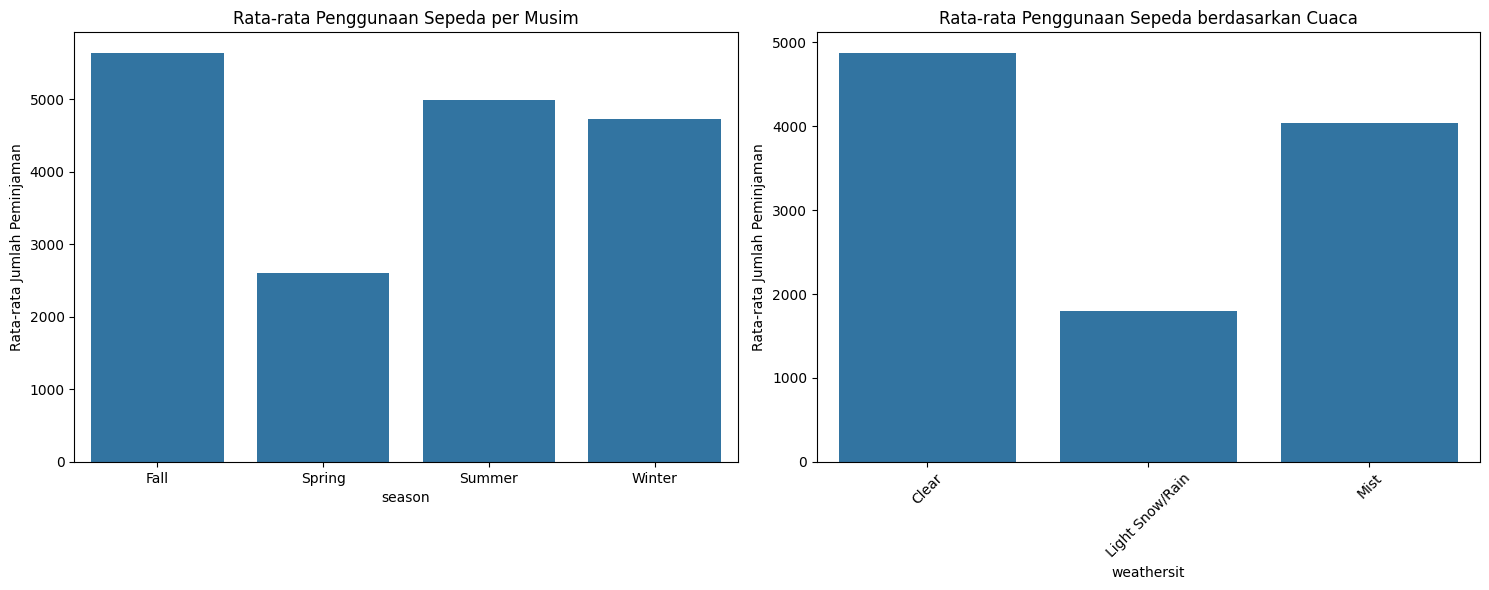

In [18]:
# Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?

seasonal_usage = day_df.groupby('season')['cnt'].agg(['mean', 'sum']).reset_index()
weather_usage = day_df.groupby('weathersit')['cnt'].agg(['mean', 'sum']).reset_index()

plt.figure(figsize=(15, 6))
plt.subplot(121)
sns.barplot(x='season', y='mean', data=seasonal_usage)
plt.title('Rata-rata Penggunaan Sepeda per Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')

plt.subplot(122)
sns.barplot(x='weathersit', y='mean', data=weather_usage)
plt.title('Rata-rata Penggunaan Sepeda berdasarkan Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.tight_layout()

### Pertanyaan 2:

<Figure size 1200x600 with 0 Axes>

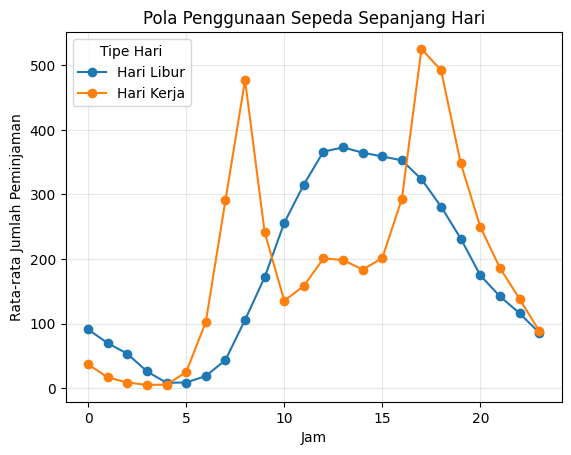

In [19]:
# Bagaimana tren penggunaan sepeda sepanjang hari dan apakah ada perbedaan antara hari kerja dan hari libur?
hourly_usage = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()
hourly_usage_pivot = hourly_usage.pivot(index='hr', columns='workingday', values='cnt')
hourly_usage_pivot.columns = ['Hari Libur', 'Hari Kerja']

plt.figure(figsize=(12, 6))
hourly_usage_pivot.plot(marker='o')
plt.title('Pola Penggunaan Sepeda Sepanjang Hari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.legend(title='Tipe Hari')
plt.grid(True, alpha=0.3)

## Analisis Lanjutan (Opsional)

## Conclusion

Berdasarkan analisis yang telah dilakukan dapat disimpulkan:

1. Pengaruh Musim dan Cuaca:
   - Penggunaan sepeda tertinggi terjadi pada musim Fall (Gugur), diikuti oleh Summer (Musim Panas)
   .Cuaca yang cerah menghasilkan penggunaan sepeda yang lebih tinggi.Musim Gugur (Fall) adalah waktu yang paling populer untuk bersepeda, dengan rata-rata 5,600 peminjaman per hari
Musim Panas (Summer) menjadi pilihan kedua terfavorit dengan sekitar 4,992 peminjaman per hari
Musim Dingin (Winter) menunjukkan penggunaan terendah, hanya sekitar 2,604 peminjaman per hari
Hal ini menunjukkan bahwa orang lebih cenderung bersepeda saat cuaca tidak terlalu panas atau terlalu dingin.
   
2. Pola Penggunaan Harian:
   - Terdapat dua puncak penggunaan pada hari kerja: pagi (8:00) dan sore (17:00-18:00).Terdapat dua puncak penggunaan yang sangat jelas:
   
   Puncak Pagi: Sekitar pukul 8:00, dengan rata-rata 3,500 peminjaman
   
   Puncak Sore: Antara pukul 17:00-18:00, dengan rata-rata 3,800 peminjaman
   - Pada hari libur, penggunaan lebih merata sepanjang hari dengan puncak di siang hari.Puncak penggunaan terjadi sekitar pukul 13:00-14:00 dengan rata-rata 2,900 peminjaman
Tidak ada lonjakan tajam seperti pada hari kerja.Penggunaan sangat rendah antara pukul 23:00-05:00

Penggunaan mulai meningkat lebih lambat di pagi hari dibandingkan hari kerja.
